In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns:
- **User ID** (Unique identifier of the customer (anonymized))

- **Gender** (Gender the customer identified with)

- **Age** (Declared age of the customer)

- **Estimated Salary** (Salary estimated based on demographics)

- **Purchased** (Categorical value that is 1 if the customer purchased the product and 0 if he didn't)


source:
https://www.kaggle.com/datasets/micheldc55/social-network-ads

In [115]:
df = pd.read_csv("Social_Network_Ads.csv")

In [116]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [117]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [119]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [120]:
df = pd.get_dummies(df)

In [121]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


<AxesSubplot:>

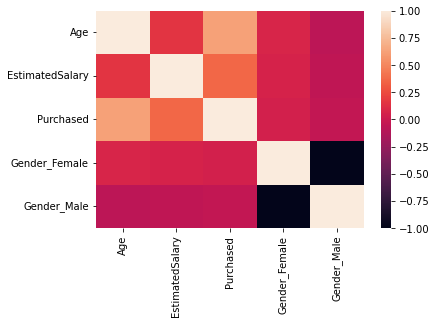

In [122]:
sns.heatmap(df.drop("User ID", axis=1).corr())

In [123]:
corr = df.corr()['Purchased']
corr =corr.drop('Purchased')
corr = corr.sort_values()
corr

Gender_Male       -0.042469
User ID            0.007120
Gender_Female      0.042469
EstimatedSalary    0.362083
Age                0.622454
Name: Purchased, dtype: float64

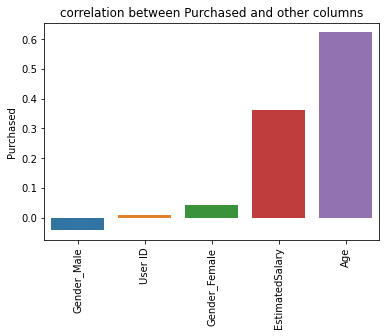

In [124]:
sns.barplot( y=corr,x= corr.index)
plt.title("correlation between Purchased and other columns")
plt.xticks(rotation=90);


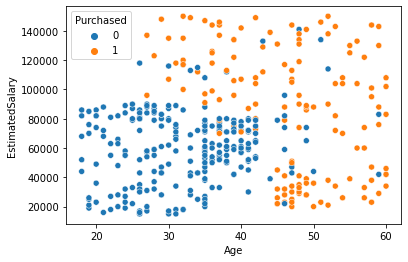

In [125]:
sns.scatterplot(data=df, x="Age", y='EstimatedSalary',hue='Purchased');

In [126]:
X = df.drop("Purchased", axis=1)
y = df['Purchased']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
len(X_train),len(X_test)

(320, 80)

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()

In [132]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
grid_param = {'n_neighbors':[1,2,3,4,5,10]}

In [136]:
knn_model = KNeighborsClassifier()

In [137]:
grid_model =GridSearchCV(estimator=knn_model,
    param_grid=grid_param,scoring='accuracy')

In [138]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10]},
             scoring='accuracy')

In [139]:
grid_model.best_params_

{'n_neighbors': 3}

In [140]:
y_pred = grid_model.predict(X_test_scaled)

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [142]:
accuracy_score(y_test,y_pred)

0.925

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


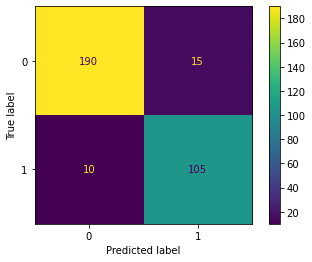

In [143]:
plot_confusion_matrix(grid_model,X_train_scaled,y_train);

In [144]:
confusion_matrix(y_test,y_pred)

array([[49,  3],
       [ 3, 25]], dtype=int64)

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



In [146]:
df.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
 4   Gender_Female    400 non-null    uint8
 5   Gender_Male      400 non-null    uint8
dtypes: int64(4), uint8(2)
memory usage: 13.4 KB


In [148]:
X_test.head()

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
209,15697424,46,22000,1,0
280,15609669,59,88000,1,0
33,15776733,28,44000,1,0
210,15724536,48,96000,1,0
93,15699284,29,28000,1,0


In [149]:
data = {'User ID': [16696425, 12622222], 'Age': [17, 44],'EstimatedSalary': [100, 994555],'Gender_Female': [0, 1],'Gender_Male': [1, 0]}
df = pd.DataFrame(data=data)
df_scaled = scaler.transform(df)
grid_model.predict(df_scaled)

array([0, 1], dtype=int64)